In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
from math import sin, cos

In [2]:
df = pd.read_csv('interpolated.csv')

## Original steering angle distribution

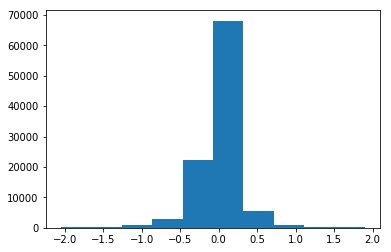

In [60]:
bins_cnt, bins,_ = plt.hist(df.angle, bins=10) 

# Dataset Utils

In [61]:
def datasetTreatment(dataframe):
    """
    Make the steering angle has uniform distribution by getting rid of
    the bins having too many samples
    
    :param dataframe:
        cotains infor of csv file
        
    :return:
        dataframe with uniform distributed steering angle
    """
    # create histogram of original dataset
    bins_cnt, bins,_ = plt.hist(dataframe.angle, bins=10)
    
    # calculate keep_prob for each bins
    bins_list = [(bins[i], bins[i + 1]) for i in range(len(bins) - 1)]
    keep_prob = []
    baseline = bins_cnt.mean()
    for cnt in bins_cnt:
        if cnt < baseline:
            keep_prob.append(1.)
        else:
            keep_prob.append(baseline / cnt)
    
    # Append 'keep' column to dataframe
    dataframe['keep'] = pd.Series(np.array([False for i in range(len(dataframe.index))]), index=dataframe.index)
    
    # Sort dataframe wrt angle
    dataframe.sort_values('angle', inplace=True)
    
    # iterate through every row and decide whether to keep this row according bins' keep_prob
    bins_idx = 0  # which bins to start testing if this angle is belong to
    for index, row in dataframe.iterrows():
        # Find bins contains this angle
        for _idx in range(bins_idx, len(bins_list)):
            if row['angle'] >= bins_list[_idx][0] and row['angle'] <= bins_list[_idx][1]:
                # Decide whether to keep this angle
                if bernoulli.rvs(keep_prob[_idx]):
                    dataframe.at[index, 'keep'] = True
                # update bins_idx
                if _idx != bins_idx:
                    bins_idx = _idx
                break  # stop finding bins for this angle & move on to next row
    
    return dataframe.loc[dataframe.keep].drop(columns='keep')


def datasetSeparateTrainValidation(dataframe):
    """
    Separate dataframe into training set (80%) and validation set (20%)
    
    :param dataframe:
    
    :return:
        training_df, validation_df
    """
    # shuffle dataframe
    dataframe = dataframe.sample(frac=1).reset_index(drop=True)
    # separate
    training_end = int(0.8 * len(dataframe))
    training_df = dataframe.iloc[: training_end, :]
    validation_df = dataframe.iloc[training_end: , :]
    
    return training_df, validation_df
    

# Uniformize Dataset

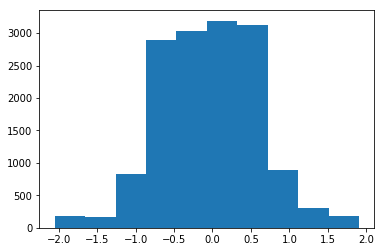

In [67]:
new_df = datasetTreatment(new_df)

(array([ 179.,  171.,  822., 1452., 1482., 1460., 1507.,  893.,  304.,
         177.]),
 array([-2.05076194, -1.65527033, -1.25977871, -0.8642871 , -0.46879549,
        -0.07330388,  0.32218773,  0.71767935,  1.11317096,  1.50866257,
         1.90415418]),
 <a list of 10 Patch objects>)

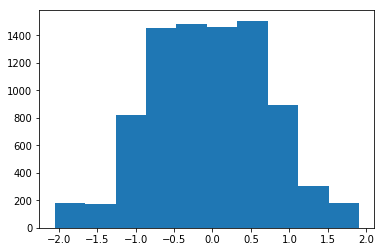

In [68]:
plt.hist(new_df.angle, bins=10)

In [69]:
len(new_df)

8447

# Get training & validation dataset

In [70]:
training_df, validation_df = datasetSeparateTrainValidation(new_df)

In [71]:
# Export to csv
training_df.to_csv('ch2_training.csv')
validation_df.to_csv('ch2_validation.csv')

# Test distribution of 2 datasets

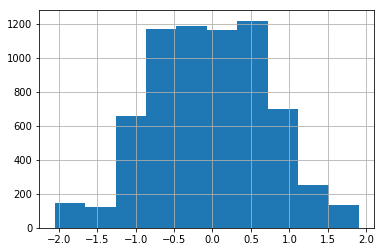

In [73]:
test_df = pd.read_csv('ch2_training.csv')
test_df.angle.hist()

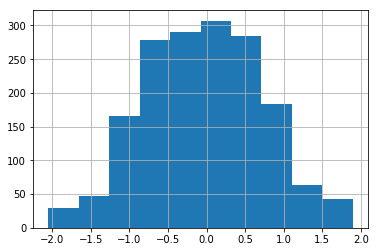

In [74]:
test_df = pd.read_csv('ch2_validation.csv')
test_df.angle.hist()

In [3]:
df

,index,timestamp,width,height,frame_id,filename,angle,torque,speed,lat,long,alt
0,2016-11-17 23:10:15.873184606,1479424215873184606,640,480,left_camera,left/1479424215873184606.png,0.000360,0.375000,23.003350,37.545269,-122.326485,8.116664
1,2016-11-17 23:10:15.877284689,1479424215877284689,640,480,right_camera,right/1479424215877284689.png,0.000717,0.375000,23.003919,37.545269,-122.326485,8.123680
2,2016-11-17 23:10:15.880976321,1479424215880976321,640,480,center_camera,center/1479424215880976321.png,0.001039,0.375000,23.004431,37.545269,-122.326492,8.128418
3,2016-11-17 23:10:15.922817911,1479424215922817911,640,480,left_camera,left/1479424215922817911.png,0.003491,0.394737,23.007310,37.545261,-122.326500,8.139066
4,2016-11-17 23:10:15.927281227,1479424215927281227,640,480,right_camera,right/1479424215927281227.png,0.003491,0.380823,23.006074,37.545261,-122.326500,8.144778
5,2016-11-17 23:10:15.930775951,1479424215930775951,640,480,center_camera,center/1479424215930775951.png,0.003491,0.369925,23.006007,37.545261,-122.326500,8.149365
6,2016-11-17 23:10:15.972815517,1479424215972815517,640,480,left_camera,left/1479424215972815517.png,0.003491,0.363861,23.008333,37.545254,-122.326508,8.210505
7,2016-11-17 23:10:15.977378050,1479424215977378050,640,480,right_camera,right/1479424215977378050.png,0.003491,0.349617,23.008333,37.545254,-122.326508,8.221686
8,2016-11-17 23:10:15.980916687,1479424215980916687,640,480,center_camera,center/1479424215980916687.png,0.003491,0.338570,23.008333,37.545254,-122.326508,8.226621
9,2016-11-17 23:10:16.022820692,1479424216022820692,640,480,left_camera,left/1479424216022820692.png,0.004670,0.479716,23.006457,37.545246,-122.326515,8.291892


In [3]:
def latLong2XYZ(lat, long):
    """
    Convert latitude & longitude into Earth-centered earth-fixed Cartesian coordinate
    z goes through 2 poles
    x cuts 0-latitude line & 0-longitude line
    y = z cross x
    
    Input:
        lat: latitude (scalar)
        long: longitude (scalar)
    
    Output:
        (x, y, z): Cartesian coordinate (list)
    """
    R = 6.3781 * 1e6  # earth radius (meter)
    z = R * sin(lat)
    x = R * cos(lat) * cos(long)
    y = R * cos(lat) * sin(long)
    
    return [x, y, z]


def _distance(p1, p2):
    """
    Calculate distance between 2 points in Cartesian space
    
    Input:
        p1 & p2: Cartesian coordiante (list)
    
    Return:
        distance between p1 & p2 (scalar)
    """
    p1 = np.array(p1)
    p2 = np.array(p2)
    return np.linalg.norm(p1 - p2)
    
    
def f2fDistance(df1, df2, display=False):
    """
    Calculate distance travelled between 2 data frame
    
    Input:
        df1 & df2: pandas.core.series.Series
    
    Output:
        distancetravelled between df1 & df2 (scalar)
    """
    p1 = latLong2XYZ(df1.lat * np.pi/180, df1.long * np.pi/180)
    p2 = latLong2XYZ(df2.lat * np.pi/180, df2.long * np.pi/180)
    
    if display:
        print('p1:\t', p1)
        print('p2:\t', p2)
        
    return _distance(p1, p2)

In [4]:
center_cam_idx = df['frame_id'] == 'center_camera'
center_cam_df = df[center_cam_idx]

In [5]:
center_cam_df

,index,timestamp,width,height,frame_id,filename,angle,torque,speed,lat,long,alt
2,2016-11-17 23:10:15.880976321,1479424215880976321,640,480,center_camera,center/1479424215880976321.png,0.001039,0.375000,23.004431,37.545269,-122.326492,8.128418
5,2016-11-17 23:10:15.930775951,1479424215930775951,640,480,center_camera,center/1479424215930775951.png,0.003491,0.369925,23.006007,37.545261,-122.326500,8.149365
8,2016-11-17 23:10:15.980916687,1479424215980916687,640,480,center_camera,center/1479424215980916687.png,0.003491,0.338570,23.008333,37.545254,-122.326508,8.226621
11,2016-11-17 23:10:16.030737492,1479424216030737492,640,480,center_camera,center/1479424216030737492.png,0.005236,0.491111,23.005161,37.545246,-122.326515,8.302497
14,2016-11-17 23:10:16.080827865,1479424216080827865,640,480,center_camera,center/1479424216080827865.png,0.006234,0.571443,23.002382,37.545238,-122.326525,8.377784
17,2016-11-17 23:10:16.130778849,1479424216130778849,640,480,center_camera,center/1479424216130778849.png,0.014297,0.742006,23.015956,37.545231,-122.326538,8.454563
20,2016-11-17 23:10:16.180687241,1479424216180687241,640,480,center_camera,center/1479424216180687241.png,0.023837,0.652962,23.012646,37.545223,-122.326546,8.502451
23,2016-11-17 23:10:16.230735818,1479424216230735818,640,480,center_camera,center/1479424216230735818.png,0.033161,0.562500,23.019008,37.545216,-122.326553,8.577695
26,2016-11-17 23:10:16.280736012,1479424216280736012,640,480,center_camera,center/1479424216280736012.png,0.032200,0.299817,23.016948,37.545208,-122.326561,8.655951
29,2016-11-17 23:10:16.330780633,1479424216330780633,640,480,center_camera,center/1479424216330780633.png,0.029588,0.187500,23.033597,37.545203,-122.326576,8.727767


In [6]:
inter_frame_dist = np.array([f2fDistance(center_cam_df.iloc[i], center_cam_df.iloc[i + 1]) for i in range(len(center_cam_df) - 1)])

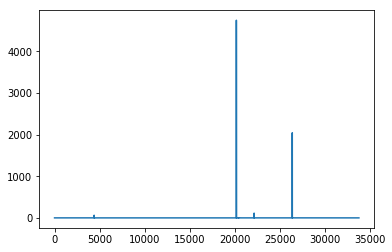

In [7]:
plt.plot(inter_frame_dist)
plt.show()

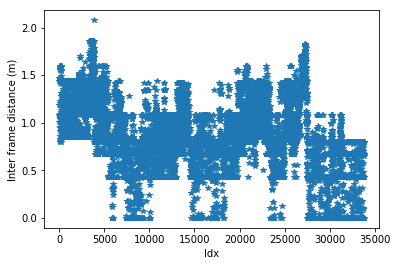

In [10]:
def filterOutlierDistance(inter_frame_dist, bins_edge_arr=[0, 10, 10000]):
    """
    Remove outlier w.r.t distance between 2 adjacent frames
    Input:
        inter_frame_dist: array of distance between 2 adjacent frames (np.array)
    Output:
        filtered_inter_frame_dist (np.array)
        filtered_idx: T/F array of index of inter_frame_dist, False for outlier distance (np.array)
    """
    bins_cnt, bins_edge = np.histogram(inter_frame_dist, bins=bins_edge_arr)
    filtered_idx = inter_frame_dist < bins_edge_arr[1]
    return inter_frame_dist[filtered_idx], filtered_idx
    
filtered_inter_frame_dist, filterd_idx = filterOutlierDistance(inter_frame_dist)
plt.plot(filtered_inter_frame_dist, '*')
plt.xlabel('Idx')
plt.ylabel('Inter frame distance (m)')
plt.show()

## Create training examples for hybrid approach

Each training example is a chunk of 3 images. Distance between 2 adjacent images is 4 meter 

total_dist =  37.438647693216474


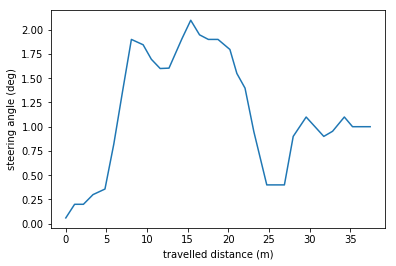

In [39]:
SPATIAL_DIST_HISTORY = 12.
PLANNING_HORIZON = 25.

# Find list of frame & corresponding steering angle that 12 meters away from starting_idx frame
starting_idx = 0
# initialize frame_list, steering_list & total_dist
frame_list = [center_cam_df.iloc[starting_idx].filename]
steering_list = [center_cam_df.iloc[starting_idx].angle]
travelled_dist_list = [0.]
total_dist = 0.
i = starting_idx + 1
while np.abs(total_dist - (SPATIAL_DIST_HISTORY + PLANNING_HORIZON)) > 0.5 :
    if filterd_idx[i]:
        total_dist += inter_frame_dist[i]
        frame_list.append(center_cam_df.iloc[i].filename)
        steering_list.append(center_cam_df.iloc[i].angle)
        travelled_dist_list.append(total_dist)
        i += 1
    else:
        print('Early stopping due to end of segment')
        break

# Display
print('total_dist = ', total_dist)
# print('frame', '\t\t\t\t', 'travelled_dist', '\t', 'steering')
# for frame, travelled_dist, steering in zip(frame_list, travelled_dist_list, steering_list):
#     print(frame, '\t\t%.6f\t%.6f' % (travelled_dist, steering))

plt.plot(travelled_dist_list, np.array(steering_list) * 180./np.pi)
plt.xlabel('travelled distance (m)')
plt.ylabel('steering angle (deg)')
plt.show()

In [97]:
def generateTrainingSample(center_cam_df, inter_frame_dist, filterd_idx, starting_idx):
    """
    Generate 1 training sample as a dictionary with 3 items: frames_list, steering_angles_list, 
    and travelled_dist_list
    
    Input:
        center_cam_df: dataframe contains info frame captured by center camera only (pandas.Dataframe)
        inter_frame_dist: raw array of distance between 2 adjacent frames (np.array)
        filtered_idx: T/F array of index of inter_frame_dist, False for outlier distance (np.array)
        starting_idx: idx of frame starting from which the training sample is built
    
    Output:
        if sample is complete (contains 35 meteres)
            training_sample: (python dict)  
        else
            idx in center_cam_df of last element of sample 
        
    """
    if starting_idx > len(inter_frame_dist) - 1:
        return starting_idx
    
    # initilize
    frames_list = [center_cam_df.iloc[starting_idx].filename]
    steering_angles_list = [center_cam_df.iloc[starting_idx].angle]
    travelled_dist_list = [0.]
    total_dist = 0.
    i = starting_idx + 1  # idx of row in center_cam_df 
    # loop
    incomplete_sample = False
    start_print = False
    while total_dist < (SPATIAL_DIST_HISTORY + PLANNING_HORIZON):
        if i - 1 == len(inter_frame_dist) - 1:
            print('End of inter_frame_dist')
            incomplete_sample = True
            break
            
        if filterd_idx[i - 1]:
            total_dist += inter_frame_dist[i - 1]
            frames_list.append(center_cam_df.iloc[i].filename)
            steering_angles_list.append(center_cam_df.iloc[i].angle)
            travelled_dist_list.append(total_dist)
            i += 1
        else:
            print('Early stopping due to end of segment')
            incomplete_sample = True
            break
    
    if incomplete_sample:
        return i
            
    return {'frames': frames_list, 'steering_angles': steering_angles_list, 'travelled_dist': travelled_dist_list}

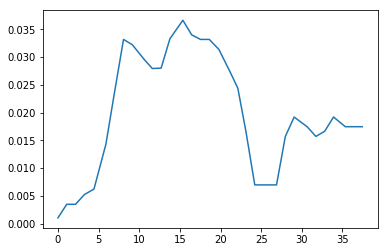

In [89]:
training_sample = generateTrainingSample(center_cam_df, inter_frame_dist, filterd_idx, 0)
plt.plot(training_sample['travelled_dist'], training_sample['steering_angles'])
plt.show()

In [98]:
# Generate dataset
hybrid_dataset = []

starting_idx = 0 
while starting_idx < len(center_cam_idx):
    out = generateTrainingSample(center_cam_df, inter_frame_dist, filterd_idx, starting_idx)
    if type(out) == dict:  # get a complete sample
        hybrid_dataset.append(out)
        starting_idx += len(out['travelled_dist'])
    else:
        starting_idx = out + 1 # 
    

Early stopping due to end of segment
Early stopping due to end of segment
Early stopping due to end of segment
Early stopping due to end of segment
End of inter_frame_dist


In [104]:
hybrid_dataset[0]

{'frames': ['center/1479424215880976321.png',
  'center/1479424215930775951.png',
  'center/1479424215980916687.png',
  'center/1479424216030737492.png',
  'center/1479424216080827865.png',
  'center/1479424216130778849.png',
  'center/1479424216180687241.png',
  'center/1479424216230735818.png',
  'center/1479424216280736012.png',
  'center/1479424216330780633.png',
  'center/1479424216380799785.png',
  'center/1479424216430781730.png',
  'center/1479424216480762377.png',
  'center/1479424216530765955.png',
  'center/1479424216580819669.png',
  'center/1479424216630792775.png',
  'center/1479424216680854175.png',
  'center/1479424216730862316.png',
  'center/1479424216780885293.png',
  'center/1479424216830915255.png',
  'center/1479424216880892024.png',
  'center/1479424216930863448.png',
  'center/1479424216980850063.png',
  'center/1479424217030843881.png',
  'center/1479424217080912028.png',
  'center/1479424217131110240.png',
  'center/1479424217180921434.png',
  'center/14794242